In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from replay_trajectory_classification import ClusterlessClassifier
from nwb_datajoint.common import IntervalList
from nwb_datajoint.decoding.clusterless import UnitMarksIndicatorSelection, UnitMarksIndicator, UnitMarks, ClusterlessClassifierParameters
from nwb_datajoint.decoding.core import _restore_classes
from nwb_datajoint.common.common_position import IntervalPositionInfo, IntervalPositionInfoSelection, IntervalLinearizedPosition
from nwb_datajoint.common.nwb_helper_fn import get_nwb_copy_filename

In [4]:
import nwb_datajoint as nd

nwb_file_name = 'CH6120211203.nwb'

nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [5]:
import pandas as pd


pd.DataFrame((UnitMarks() & {'nwb_file_name': nwb_copy_file_name}))

,nwb_file_name,sort_group_id,sort_interval_name,filter_parameter_set_name,sorting_id,unit_inclusion_param_name,mark_param_name,analysis_file_name,marks_object_id
0,CH6120211203_.nwb,3,CH61_run,franklab_default_hippocampus,S-c90e38458423,all,default,CH6120211203_W58RXVW7ZW.nwb,9bf71cc1-50c2-4a58-97cf-2b1100a058e0
1,CH6120211203_.nwb,8,CH61_run,franklab_default_hippocampus,S-7aa3f1e8a202,all,default,CH6120211203_AVR1D5FH6I.nwb,6f2debf1-6e06-4450-81f5-b429daf2e999
2,CH6120211203_.nwb,10,CH61_run,franklab_default_hippocampus,S-a36f16ed6a84,all,default,CH6120211203_EEBPS69W13.nwb,b6621190-d8ff-40d1-91d2-140a22767114
3,CH6120211203_.nwb,11,CH61_run,franklab_default_hippocampus,S-4623868b0e49,all,default,CH6120211203_EZNTLG7WVZ.nwb,3e433872-9eaf-4d58-aa53-5804d35afb24
4,CH6120211203_.nwb,13,CH61_run,franklab_default_hippocampus,S-34ab4e41e49f,all,default,CH6120211203_J5QSD0YGZV.nwb,1cf2ee04-494f-4184-842d-b256a3fa4988
5,CH6120211203_.nwb,14,CH61_run,franklab_default_hippocampus,S-98528d01f0f3,all,default,CH6120211203_DC3SJMQ7CK.nwb,d932e5b8-d7a7-4131-b857-c790508d49fe
6,CH6120211203_.nwb,19,CH61_run,franklab_default_hippocampus,S-80f7a66129f2,all,default,CH6120211203_D7PSI05EIV.nwb,27ea175e-bdf2-4324-bdef-8650c597445c
7,CH6120211203_.nwb,20,CH61_run,franklab_default_hippocampus,S-8ef3995eb20f,all,default,CH6120211203_XJDPPM0GKQ.nwb,b54b83dc-4887-45e4-b70d-d221aa810df7
8,CH6120211203_.nwb,24,CH61_run,franklab_default_hippocampus,S-57b0395a8816,all,default,CH6120211203_U97KFQG6WU.nwb,69b5af21-97ee-455f-8fdb-14ae6ff112dd
9,CH6120211203_.nwb,26,CH61_run,franklab_default_hippocampus,S-2f1491c541ad,all,default,CH6120211203_HBGFWN4WTC.nwb,a1875e33-23cd-46a0-bbe7-60e05bc4d8d0


In [6]:
selection = ((UnitMarks() &
  {'nwb_file_name': nwb_copy_file_name, 'sort_interval_name': 'CH61_run'})
 * 
  (nd.common.IntervalList() &
   {'nwb_file_name': nwb_copy_file_name, 'interval_list_name': 'pos 0 valid times'})
  )

UnitMarksIndicatorSelection.insert(selection, ignore_extra_fields=True, skip_duplicates=True)

UnitMarksIndicator.populate()

In [12]:
from replay_trajectory_classification.environments import Environment
from replay_trajectory_classification.continuous_state_transitions import RandomWalk, Uniform
from nwb_datajoint.common.common_position import TrackGraph
from nwb_datajoint.decoding.clusterless import _convert_transitions_to_dict

parameters = (ClusterlessClassifierParameters() & {'classifier_param_name': 'default_decoding_gpu'}).fetch1()
parameters['classifier_params']['environments']

track_graph = (TrackGraph & {'track_graph_name': 'weill auto track 6 arm 4'}).get_networkx_track_graph()
track_graph_params = (TrackGraph & {'track_graph_name': 'weill auto track 6 arm 4'}).fetch1()

parameters['classifier_params']['environments'] = [
    vars(Environment(
    track_graph=track_graph_params['track_graph_name'],
    edge_order=track_graph_params['linear_edge_order'],
    edge_spacing=track_graph_params['linear_edge_spacing']))]

ClusterlessClassifierParameters.insert1(
    {'classifier_param_name': 'weill auto track 6 arm 4',
     'classifier_params': parameters['classifier_params'],
     'fit_params': parameters['fit_params'],
     'predict_params': parameters['predict_params']},
    skip_duplicates=True)

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/datajoint/blob.py:167: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(obj, (np.bool, np.bool_)):


In [13]:
key = dict(
    nwb_file_name=get_nwb_copy_filename(nwb_file_name),
    # Position
    interval_list_name='pos 0 valid times',
    position_info_param_name='default_decoding',
    # Marks
    sort_interval_name='CH61_run',
    filter_parameter_set_name='franklab_default_hippocampus',
    unit_inclusion_param_name='all',
    mark_param_name='default',
    sampling_rate=500.0,
    # 
    raw_epoch_interval=1,
    # Classifier
    classifier_param_name='weill auto track 6 arm 4',
)


position_info = (IntervalPositionInfo() &
                 {'nwb_file_name': key['nwb_file_name'],
                  'interval_list_name': key['interval_list_name'],
                  'position_info_param_name': key['position_info_param_name'],
                 }
                ).fetch1_dataframe()

linear_position_df = (IntervalLinearizedPosition() &
 {'nwb_file_name': key['nwb_file_name'],
  'interval_list_name': key['interval_list_name'],
  'position_info_param_name': key['position_info_param_name'],
 }
).fetch1_dataframe()


marks = (UnitMarksIndicator & {
    'nwb_file_name': key['nwb_file_name'],
    'sort_interval_name': key['sort_interval_name'],
    'filter_parameter_set_name': key['filter_parameter_set_name'],
    'unit_inclusion_param_name': key['unit_inclusion_param_name'],
    'mark_param_name': key['mark_param_name'],
    'interval_list_name': key['interval_list_name'],
    'sampling_rate': key['sampling_rate'],
}).fetch_xarray()

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/datajoint/hash.py:39: ResourceWarning: unclosed file <_io.BufferedReader name='/stelmo/nwb/analysis/CH6120211203_IEN7MF2J7X.nwb'>
  return uuid_from_stream(Path(filepath).open("rb"), init_string=init_string)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/datajoint/hash.py:39: ResourceWarning: unclosed file <_io.BufferedReader name='/stelmo/nwb/analysis/CH6120211203_Q7RMNI5PAZ.nwb'>
  return uuid_from_stream(Path(filepath).open("rb"), init_string=init_string)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray

In [14]:
linear_position_df.shape

(4201436, 4)

In [15]:
position_info.shape

(4201436, 6)

In [16]:
marks

<xarray.DataArray (time: 4201436, marks: 4, electrodes: 33)>
array([[[-263.,   nan,   nan, ...,   nan,   nan,   nan],
        [-134.,   nan,   nan, ...,   nan,   nan,   nan],
        [-111.,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan, -139.],
        [  nan,   nan,   nan, ...,   nan,   nan, -396.],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       ...,

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan, -197.],
        [  nan,   nan,   nan, ...,   nan,   nan, -557.],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]])
Coordinates:
  * marks    (marks) <U11 'amplitude_0' 'amplitude_1' ... 'amplitude_3'
  * time     (time) float64 1.639e+09 1.639e+09 ... 1.639e+09 1.639e+09
Dimensions without coordinates: electrodes

In [17]:
# Exclude times without valid neural data
raw_valid_times = (IntervalList() &
                   {'nwb_file_name': key['nwb_file_name'],
                    'interval_list_name': 'raw data valid times'}
                   ).fetch1('valid_times')[0]

start_time, end_time = raw_valid_times
valid_time_slice = slice(start_time, end_time)

In [18]:
from scipy.ndimage.filters import gaussian_filter1d
import numpy as np
import pandas as pd

def gaussian_smooth(data, sigma, sampling_frequency, axis=0, truncate=8):
    '''1D convolution of the data with a Gaussian.
    The standard deviation of the gaussian is in the units of the sampling
    frequency. The function is just a wrapper around scipy's
    `gaussian_filter1d`, The support is truncated at 8 by default, instead
    of 4 in `gaussian_filter1d`
    Parameters
    ----------
    data : array_like
    sigma : float
    sampling_frequency : int
    axis : int, optional
    truncate : int, optional
    Returns
    -------
    smoothed_data : array_like
    '''
    return gaussian_filter1d(
        data, sigma * sampling_frequency, truncate=truncate, axis=axis,
        mode='constant')


def get_multiunit_population_firing_rate(multiunit, sampling_frequency,
                                         smoothing_sigma=0.015):
    '''Calculates the multiunit population firing rate.
    Parameters
    ----------
    multiunit : ndarray, shape (n_time, n_signals)
        Binary array of multiunit spike times.
    sampling_frequency : float
        Number of samples per second.
    smoothing_sigma : float or np.timedelta
        Amount to smooth the firing rate over time. The default is
        given assuming time is in units of seconds.
    Returns
    -------
    multiunit_population_firing_rate : ndarray, shape (n_time,)
    '''
    return gaussian_smooth(multiunit.mean(axis=1) * sampling_frequency,
                           smoothing_sigma, sampling_frequency)


SAMPLING_FREQUENCY = 500
multiunit_spikes = (np.any(~np.isnan(marks.values), axis=1)
                    ).astype(float)
multiunit_firing_rate = pd.DataFrame(
    get_multiunit_population_firing_rate(
        multiunit_spikes, SAMPLING_FREQUENCY), index=position_info.index,
    columns=['firing_rate'])

In [14]:
from ripple_detection import multiunit_HSE_detector

multiunit_high_synchrony_times = multiunit_HSE_detector(
    marks.time.values,
    multiunit_spikes,
    position_info.head_speed.values,
    sampling_frequency=SAMPLING_FREQUENCY,
    minimum_duration=0.015,
    zscore_threshold=2.0,
    close_event_threshold=0.000)

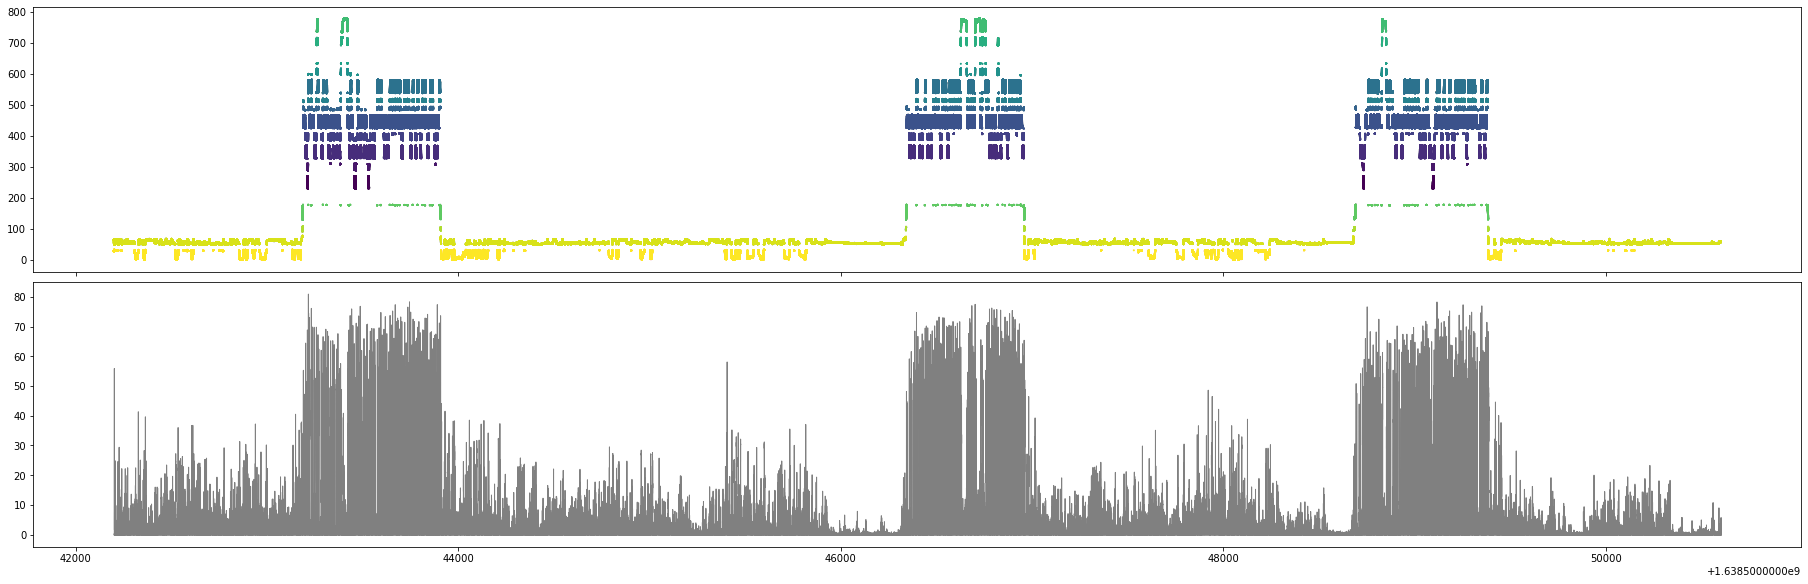

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharex=True, constrained_layout=True)
axes[0].scatter(linear_position_df.index, linear_position_df.linear_position, c=linear_position_df.track_segment_id, s=1)
axes[1].fill_between(position_info.index, position_info.head_speed, color='grey')

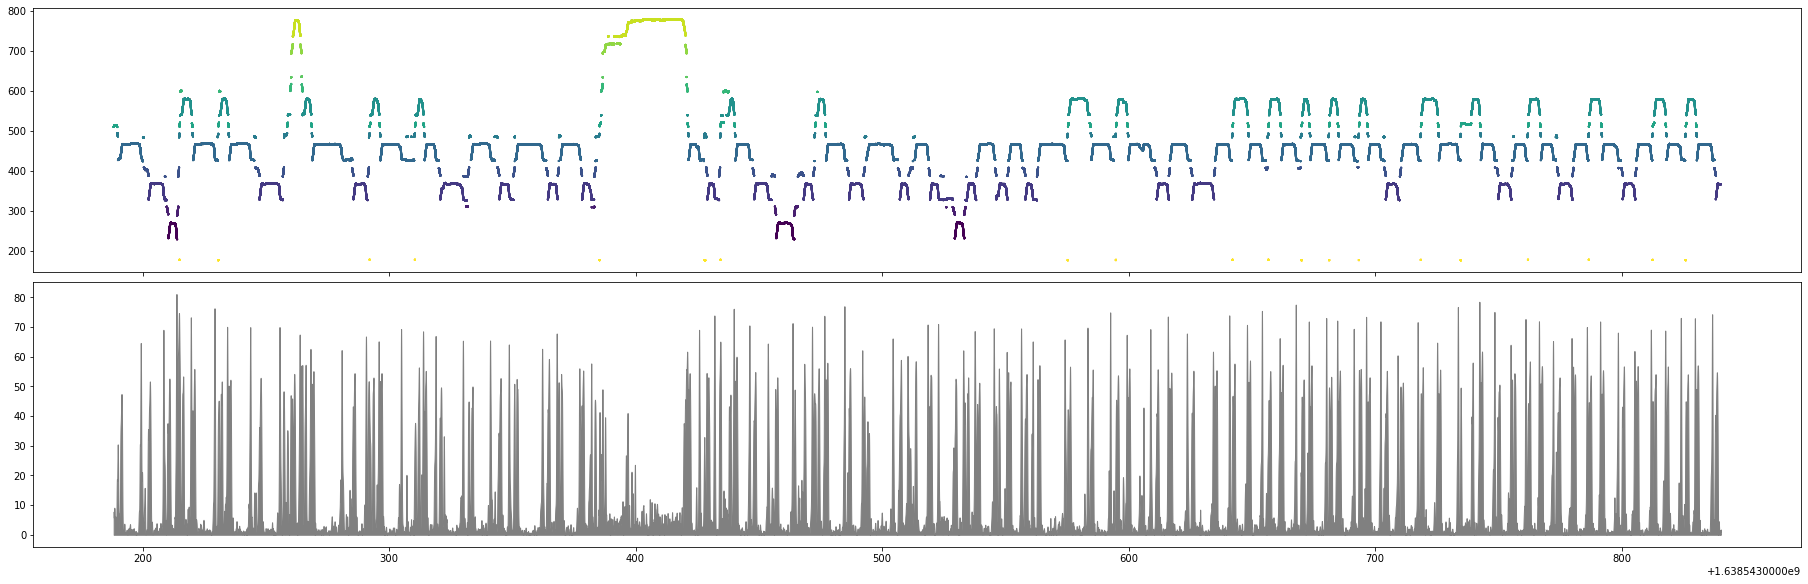

In [20]:
import matplotlib.pyplot as plt

time_slice = slice(495_000, 821_000)
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharex=True, constrained_layout=True)
axes[0].scatter(linear_position_df.index[time_slice], linear_position_df.linear_position.values[time_slice], c=linear_position_df.track_segment_id.values[time_slice], s=1)
axes[1].fill_between(position_info.index[time_slice], position_info.head_speed.values[time_slice], color='grey')

In [22]:
import pprint

linear_position_df = linear_position_df.loc[valid_time_slice]
marks = marks.sel(time=valid_time_slice)
position_info = position_info.loc[valid_time_slice]

parameters = (ClusterlessClassifierParameters() & {'classifier_param_name': key['classifier_param_name']}).fetch1()
parameters = _restore_classes(parameters)

pprint.pprint(parameters)

{'classifier_param_name': 'weill auto track 6 arm 4',
 'classifier_params': {'clusterless_algorithm': 'multiunit_likelihood_integer_cupy',
                       'clusterless_algorithm_params': {'mark_std': 20.0,
                                                        'position_std': 6.0},
                       'continuous_transition_types': [[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0),
                                                        Uniform(environment_name='', environment2_name=None)],
                                                       [Uniform(environment_name='', environment2_name=None),
                                                        Uniform(environment_name='', environment2_name=None)]],
                       'discrete_transition_type': DiagonalDiscrete(diagonal_value=0.98),
                       'environments': [Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f7c7475f0d0>

In [23]:
classifier = ClusterlessClassifier(**parameters['classifier_params'])
classifier.fit(
    is_training=position_info.head_speed.values > 4,
    position=linear_position_df.linear_position.values,
    multiunits=marks.values,
    **parameters['fit_params']
)

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/replay_trajectory_classification/bins.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_segment_id[is_nan] = 0  # need to check
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/replay_trajectory_classification/bins.py:352: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_track_interior = np.ones_like(place_bin_centers, dtype=np.bool)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/pytho

ClusterlessClassifier(clusterless_algorithm='multiunit_likelihood_integer_cupy',
                      clusterless_algorithm_params={'mark_std': 20.0,
                                                    'position_std': 6.0},
                      continuous_transition_types=[[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0),
                                                    Uniform(environment_name='', environment2_name=None)],
                                                   [Uniform(environment_name='', environment2_name=None),
                                                    U...
                      environments=[Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f7c7475f0d0>, edge_order=[(17, 16), (16, 15), (15, 13), (13, 12), (14, 13), (1, 0), (1, 3), (3, 2), (3, 5), (5, 4), (5, 12), (12, 7), (7, 6), (7, 9), (9, 8), (9, 11), (11, 10)], edge_spacing=15, is_track_interior=None, position_range=None,

In [24]:
import matplotlib.pyplot as plt
import copy


def plot_hse(time_slice, results, classifier, linear_position_df, position_info, multiunit_firing_rate):
    cmap = 'bone_r'
    cmap = copy.copy(plt.cm.get_cmap(cmap))
    cmap.set_bad(color="lightgrey", alpha=1.0)

    fig, axes = plt.subplots(4, 1, sharex=True, constrained_layout=True, figsize=(9, 7), gridspec_kw={'height_ratios': [1, 1, 3, 1]}, dpi=100)

    # ax 0
    axes[0].fill_between(results.time, multiunit_firing_rate.loc[time_slice].squeeze(), color='black')
    axes[0].set_ylabel('Multiunit\nRate\n[spikes / s]')

    # ax 1
    axes[1].plot(results.time, results.acausal_posterior.sum('position').values)
    axes[1].set_ylabel('Prob.')

    # ax 2
    results.acausal_posterior.sum('state').where(classifier.environments[0].is_track_interior_).plot(
        x='time', y='position', ax=axes[2], cmap=cmap, vmin=0.0, vmax=0.2)
    axes[2].scatter(results.time, linear_position_df.loc[time_slice].linear_position, s=5, color='magenta', zorder=10)
    axes[2].set_ylabel('Position [cm]')
    axes[2].set_xlabel('')

    # ax 3
    axes[3].fill_between(results.time, position_info.loc[time_slice].head_speed, color='grey')
    axes[3].set_ylabel('Speed\n[cm / s]')

    axes[-1].set_xlabel('Time [s]')

In [25]:
ripple_times = np.load('ch61_12_03_ripples.pkl', allow_pickle=True)
ripple_times

,start_time,end_time
ripple_number,,
1,1.638542e+09,1.638542e+09
2,1.638542e+09,1.638542e+09
3,1.638542e+09,1.638542e+09
4,1.638542e+09,1.638542e+09
5,1.638542e+09,1.638542e+09
...,...,...
1230,1.638551e+09,1.638551e+09
1231,1.638551e+09,1.638551e+09
1232,1.638551e+09,1.638551e+09


In [ ]:
from tqdm.autonotebook import tqdm
import xarray as xr

results = [
    classifier.predict(multiunits=marks.sel(time=slice(df.start_time, df.end_time)),
                             time=marks.sel(time=slice(df.start_time, df.end_time)).time - df.start_time,
                             **parameters['predict_params'])
    for _, df in tqdm(ripple_times.iterrows(), total=len(ripple_times), desc='ripples')]



results = xr.concat(results, dim=ripple_times.index)
results

In [ ]:
results.to_netcdf('ch61_12_03_ripples_results.nc')

In [27]:
import xarray as xr


results = xr.open_dataset('CH61/ch61_12_03_ripples_results.nc')

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [ ]:
for ripple_number, df in ripple_times.iterrows():
    plot_hse(slice(df.start_time, df.end_time), results.sel(ripple_number=ripple_number).dropna('time', how='all'), classifier, linear_position_df, position_info, multiunit_firing_rate)
    plt.savefig(f'CH61/ripple_{ripple_number:02d}.png')
    plt.close()

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__v

(-3.141592653589793, 3.141592653589793)

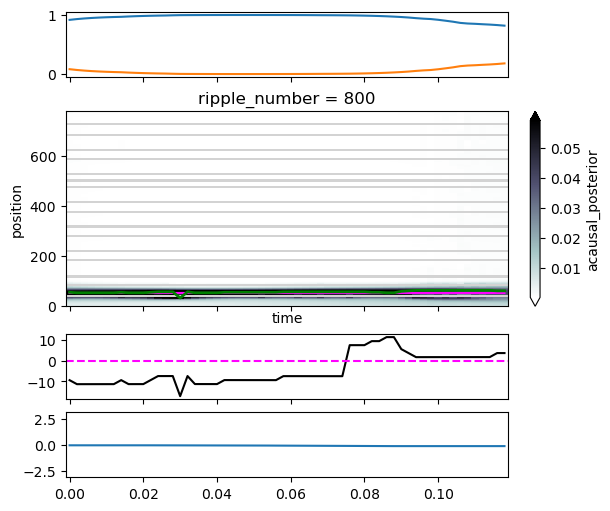

In [46]:
from trajectory_analysis_tools import (get_ahead_behind_distance,
                                       get_trajectory_data,
                                       maximum_a_posteriori_estimate)



ripple_number = 800


posterior = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("state")
prob = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("position")
pos_info = linear_position_df.copy()
pos_info['head_direction'] = position_info['head_orientation']

trajectory_data = get_trajectory_data(
    posterior,
    track_graph,
    classifier,
    pos_info)

ahead_behind_distance = get_ahead_behind_distance(
    track_graph, *trajectory_data)


cmap = 'bone_r'
cmap = copy.copy(plt.cm.get_cmap(cmap))
cmap.set_bad(color="lightgrey", alpha=1.0)

fig, axes = plt.subplots(4, 1, figsize=(6, 5), sharex=True, constrained_layout=True,
                         gridspec_kw={'height_ratios': [1, 3, 1, 1]}, dpi=100)
axes[0].plot(prob.time, prob.values)
posterior.where(classifier.environments[0].is_track_interior_).plot(x='time', y='position', ax=axes[1], robust=True, cmap=cmap)
lin_pos = pos_info.loc[ripple_times.loc[ripple_number].start_time:ripple_times.loc[ripple_number].end_time].linear_position
head_dir = pos_info.loc[ripple_times.loc[ripple_number].start_time:ripple_times.loc[ripple_number].end_time].head_direction
axes[1].plot(posterior.time, lin_pos.values, color='magenta')
axes[1].plot(posterior.time, maximum_a_posteriori_estimate(posterior).squeeze(), color='green', linewidth=2)
axes[2].plot(posterior.time, ahead_behind_distance, color='black')
axes[2].axhline(0, color='magenta', linestyle='--')

axes[3].plot(posterior.time, head_dir)
axes[3].set_ylim((-np.pi, np.pi))

In [49]:
from trajectory_analysis_tools import (get_ahead_behind_distance,
                                       get_trajectory_data,
                                       maximum_a_posteriori_estimate)


def get_stats(results, ripple_number, pos_info, classifier):
    posterior = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("state")
    prob = results.sel(ripple_number=ripple_number).dropna('time', how='all').acausal_posterior.sum("position")

    trajectory_data = get_trajectory_data(
        posterior,
        track_graph,
        classifier,
        pos_info)

    ahead_behind_distance = get_ahead_behind_distance(
        track_graph, *trajectory_data)

    is_cont = prob.sel(state='Continuous') > 0.8
    is_frag = prob.sel(state='Uniform') > 0.8
    
    avg_cont_replay_dist = np.abs(ahead_behind_distance[is_cont]).mean()
    cont_dist_travelled = np.sum(np.abs(np.diff(np.abs(ahead_behind_distance[is_cont]))))
    
    cont_duration = is_cont.sum() * 0.002
    frag_duration = is_frag.sum() * 0.002
    
    return float(cont_duration), float(frag_duration), float(avg_cont_replay_dist), float(cont_dist_travelled)

In [50]:
pos_info = linear_position_df.copy()
pos_info['head_direction'] = position_info['head_orientation']

stats = [get_stats(results, ripple_number, pos_info, classifier) for ripple_number in ripple_times.index]
stats = pd.DataFrame(
    stats,
    columns=['continuous_duration', 'framented_duration', 'avg_continuous_replay_distance', 'cont_distance_travelled'])
stats.to_csv('CH61/CH61_ripple_decode_stats.csv')
stats

/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/home/edeno/miniconda3/envs/nwb_datajoint/lib/python3.8/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion

,continuous_duration,framented_duration,avg_continuous_replay_distance,cont_distance_travelled
0,0.156,0.0,9.540773,27.381671
1,0.120,0.0,19.904131,47.957725
2,0.066,0.0,16.503091,37.694333
3,0.344,0.0,9.718906,54.875862
4,0.220,0.0,18.114104,55.776578
...,...,...,...,...
1229,0.136,0.0,120.263339,21.238824
1230,0.066,0.0,7.436424,0.111235
1231,0.092,0.0,6.786506,7.843373
1232,0.138,0.0,8.035470,4.067608


In [122]:
stats = pd.DataFrame(
    stats,
    columns=['continuous_duration', 'framented_duration', 'avg_continuous_replay_distance'])
stats

,continuous_duration,framented_duration,avg_continuous_replay_distance
0,0.156,0.0,9.540773
1,0.120,0.0,19.904131
2,0.066,0.0,16.503091
3,0.344,0.0,9.718906
4,0.220,0.0,18.114104
...,...,...,...
1229,0.136,0.0,120.263339
1230,0.066,0.0,7.436424
1231,0.092,0.0,6.786506
1232,0.138,0.0,8.035470


In [124]:
stats.to_csv('CH61/CH61_ripple_decode_stats.csv')

In [9]:
pd.concat((position_info, linear_position_df), axis=1).to_csv('CH61/position_info_CH61.csv')